# Introduction

Cet examen se base sur les données météo france de 2018

# Import des modules

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier (1 pt)
Lire le fichier datas.csv dans un DataFrame df

In [120]:
df = pd.read_csv("meteo.csv")#,index_col = 0)

# Aperçu du tableau (1 pt)
Afficher les 10 première lignes du DataFrame

In [121]:
df.head(10)

,Nom,Date,Température,Pression au niveau mer,Humidité
0,TROYES-BARBEREY,2018-08-08,295.5750,101367.50,67.375
1,ROUEN-BOOS,2018-08-08,292.4250,101316.25,69.250
2,ORLY,2018-08-08,295.9250,101295.00,57.750
3,BALE-MULHOUSE,2018-08-08,298.1875,101310.00,61.250
4,TOULOUSE-BLAGNAC,2018-08-08,297.9750,101370.00,65.375
5,LA DESIRADE METEO,2018-08-08,302.1000,101712.50,72.000
6,TOURS,2018-08-08,294.7875,101375.00,62.000
7,GOURDON,2018-08-08,296.7625,101385.00,62.500
8,LE RAIZET AERO,2018-08-08,300.7125,101742.50,77.500
9,NANTES-BOUGUENAIS,2018-08-08,293.7500,101370.00,70.625


# Nombre de Colonnes (1 pt)
Afficher le nombre de colonnes dans le DataFrame

In [122]:
df.columns #Nous donne la liste des colonnes
n,p = df.shape #Nous donne le nombre de lignes dans n et le nombre de colonnes dans p et on affiche p
p

5

# Nombre de lignes (1 pt)
Afficher le nombre de lignes dans le DataFrame

In [123]:
df.index #donne la liste des ligne
len(df) #Donne le nombre de ligne

19545

# Données manquantes (1 pt)
Afficher le nombre données manquantes par colonne

In [124]:
len(df) - df.count() #df.count() donnne le nombre de valeurs renseignées par colonne et la difference nous donne le nombre de valeurs manquantes

Nom                         0
Date                        0
Température                76
Pression au niveau mer    929
Humidité                  176
dtype: int64

# Suppression des manquants (1 pt)
Supprimer les lignes contenant des données manquantes

In [125]:
df.dropna(inplace=True)

In [126]:
df.shape #Nous permet de vérifier que le nombre de lignes a bien été changé donc les lignes ont bien été supprimées

(18616, 5)

# Tri par nom et par date (2 pts)
Trier le DataFrame par nom et par date

In [127]:
df.sort_values(by=['Nom','Date'],inplace=True)

In [128]:
df.head() #Nous permet de voir que le trie a bien été effectué

,Nom,Date,Température,Pression au niveau mer,Humidité
2116,ABBEVILLE,2018-01-01,280.2625,100145.00,82.00
1064,ABBEVILLE,2018-01-02,277.8375,100348.75,77.00
1799,ABBEVILLE,2018-01-03,270.7250,99900.00,58.25
6787,ABBEVILLE,2018-01-04,279.9125,101096.25,77.50
6188,ABBEVILLE,2018-01-05,281.8000,101203.75,75.50


# Passage en degrés Celsius (1 pt)
Transformer les températures en Kelvin en température en degrés Celsius

    pour rappel : T(K) = T(°C) + 273.15

In [129]:
df['Température']=df.Température - 273.15

In [130]:
df.head()

,Nom,Date,Température,Pression au niveau mer,Humidité
2116,ABBEVILLE,2018-01-01,7.1125,100145.00,82.00
1064,ABBEVILLE,2018-01-02,4.6875,100348.75,77.00
1799,ABBEVILLE,2018-01-03,-2.4250,99900.00,58.25
6787,ABBEVILLE,2018-01-04,6.7625,101096.25,77.50
6188,ABBEVILLE,2018-01-05,8.6500,101203.75,75.50


# Création de l'indice THI (1 pt)
Créer une nouvelle colonne nommée THI (Temperature Humidity Index) calculée de la façon suivante :
    
    THI = T - ((0.55 - 0.0055*H) * (T - 14.5))
    avec T : Température en °C
    et H : Humidité relative en %

In [131]:
df['TH1'] = df.Température - ((0.55-0.0055*df.Humidité)*(df.Température -14.5))

In [132]:
df.head() #Nous permet de voir que la colonne 'TH1' a bien été crée

,Nom,Date,Température,Pression au niveau mer,Humidité,TH1
2116,ABBEVILLE,2018-01-01,7.1125,100145.00,82.00,7.843863
1064,ABBEVILLE,2018-01-02,4.6875,100348.75,77.00,5.928781
1799,ABBEVILLE,2018-01-03,-2.4250,99900.00,58.25,1.461403
6787,ABBEVILLE,2018-01-04,6.7625,101096.25,77.50,7.720016
6188,ABBEVILLE,2018-01-05,8.6500,101203.75,75.50,9.438288


# Température moyenne (2 pts)
Donner la température moyenne par ville

In [133]:
df.loc[:, ['Nom','Température']].groupby('Nom').mean()

,Température
Nom,
ABBEVILLE,11.304258
AJACCIO,16.558680
ALENCON,11.457674
BALE-MULHOUSE,11.914379
BASTIA,16.537162
BELLE ILE-LE TALUT,13.236339
BORDEAUX-MERIGNAC,14.248408
BOURGES,12.957671
BREST-GUIPAVAS,11.557976


# Nombre de jours plus chauds que la moyenne à Orly (3 pts)
Donner, pour Orly, le nombre de jours avec une température supérieure à la température moyenne d'Orly

In [134]:
extrait = df[df.Nom == 'ORLY'] #Nous donne un dataframe ne contenant que les informations sur 'ORLY'
len(extrait[extrait.Température > extrait.Température.mean()]) #Nous donne, pour 'ORLY' le nombre de jours avec une température supérieure à la température moyenne d'Orly

166

# Visualisation (2 pts)
Tracer le boxplot des valeurs de température à Orly

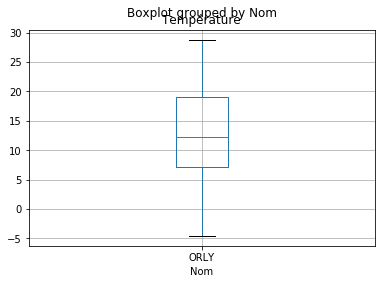

In [135]:
extrait.boxplot(column='Température',by='Nom')

# Classe (3 pts)
Créer une classe s'initialisant avec le DataFrame meteo.csv et proposant deux méthodes.
La première prend en argument un nom de ville et renvoie la température moyenne dans cette ville.
La seconde prend en argument une température et renvoie le nombre de villes pour lesquelles la température moyenne est supérieure à la température passée en argument de la méthode.

In [136]:
class Temperature_Sup():
    """
    Classe prenant un dataframe meteo et proposant deux methodes 
    Methode 1: t_moyenne_ville
    Cette methode prend en argument le nom d'une ville et renvoie la température moyenne dans la ville donnée en argument
    methode 2: n_ville_sup
    Cette methode prend en argument une température et renvoie le nombre de villes pour lesquelles la température moyenne est supérieure à la température passée en argument
    """
    def __init__(self,df):
        self.meteo = df
    
    def t_moyenne_ville(self,Ville):
        """
        Retourne la température moyenne dans Ville

        Parameters:
        Ville

        Returns:
        float: température en °C
        """
        self.Ville = Ville
        #self.extrait = self.meteo.loc[:, ['Nom','Température']].groupby('Nom').mean()
        Temp = self.meteo.Température[self.meteo.Nom == Ville].mean()
        return Temp
    def n_ville_sup(self,temp):
        """
        Retourne le nombre de villes

        Parameters:
        température temp

        Returns:
        int: Nombre de villes pour lesquelles la température moyenne est supérieure à la température passée en argument
        """
        self.temp = temp
        extrait = self.meteo.loc[:, ['Nom','Température']].groupby('Nom').mean()
        return len(extrait[extrait.Température > temp])

In [137]:
Temperature = Temperature_Sup(df)

In [138]:
Temperature.t_moyenne_ville('ORLY')

12.621875172034166

In [139]:
Temperature.n_ville_sup(14)

26